# 함수 매핑

데이터프레임에 함수를 매핑하는 방법, 데이터를 집계하는 그룹 연산, 데이터프레임을 합치거나 다양한 형태로 구조를 변경하는 방법 등에 관해 알아보자.

함수 매핑은 시리즈 또는 데이터프레임의 개별 원소를 특정 함수에 일대일 대응시키는 과정을 뜻한다. 사용자가 직접 만든 함수(lambda 함수 포함)를 적용할 수 있기 때문에 판다스 기본 함수로 처리하기 어려운 복잡한 연산을 데이터프레임 등 판다스 객체에 적용하는 것이 가능하다.

* 개별 원소에 함수 매핑

#### 시리즈 원소에 함수 매핑

시리즈 객체에 apply() 메소드를 적용하면 인자로 전달하는 매핑 함수에 시리즈의 모든 원소를 하나씩 입력하고 함수의 리턴값을 돌려받는다. 시리즈 원소의 개수만큼 리턴값을 받아서 같은 크기의 시리즈 객체로 반환한다.

        시리즈의 원소에 함수 매핑 : Series객체.apply(매핑 함수)

'titanic' 데이터셋에서 숫자 데이터로 구성된 2개의 열('age','fare')을 선택하고, 숫자 10만을 원소 값으로 갖는 새로운 열('ten')을 추가한다.

In [1]:
import seaborn as sns

# titanic 데이터셋에서 age, fare 2개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df['ten'] = 10
df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


두 가지 사용자 함수를 정의한다. apply() 메소드를 이용하여 df['age'] 열에 add_10 함수, add_two_obj 함수를 매핑하여 모든 원소에 숫자 10을 더한다.

그리고 lambda 함수를 df['age'] 열에 매핑하여 add_10 함수의 리턴값을 sr3에 저장한다. 또, lambda 함수를 사용하여 10을 더해보자.

In [2]:
# 사용자 함수 정의
def add_10(n): # 10을 더하는 함수
    return n+10

def add_two_obj(a, b):
    return a+b

print(add_10(10))
print(add_two_obj(10, 10))

20
20


In [3]:
# 시리즈 객체에 적용
sr1 = df['age'].apply(add_10)
sr1.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [4]:
# 시리즈 객체와 숫자에 적용 : 2개의 인수(시리즈 + 숫자)
sr2 = df['age'].apply(add_two_obj, b=10)
sr2.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [5]:
# 람다 함수 활용 : 시리즈 객체에 적용
sr3 = df['age'].apply(lambda x:add_10(x))
sr3.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [6]:
sr4 = df['age'].apply(lambda x: x+10)
sr4.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

#### 데이터프레임 원소에 함수 매핑

데이터프레임의개별 원소에 특정 함수를 매핑하려면, applymap() 메소드를 활용한다. 매핑 함수에 데이터프레임의 각 원소를 하나씩 넣어서 리턴값을 돌려받는다. 원소의 원래 위치에 매핑 함수의 리턴값을 입력하여 동일한 형태의 데이터프레임이 만들어진다.

        데이터프레임의 원소에 함수 매핑 : DataFrame.applymap(매핑 함수)

'titanic' 데이터셋에서 숫자 데이터로 구성된 2개의 열('age','fare')을 선택하여 만든 데이터프레임 df를 다시 활용한다. 인수 n을 입력 받아 숫자 10을 더한 결과를 반환하는 add_10(n) 함수도 다시 사용한다. applymap() 메소드를 이용하여 add_10(n) 함수를 df에 적용하면, df의 각 원소에 숫자 10을 더한 값을 원소로 갖는 데이터프레임이 만들어진다.

In [7]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [8]:
def add_10(n):
    return n+10

df_map = df.applymap(add_10)
df_map.head()

,age,fare
0,32.0,17.2500
1,48.0,81.2833
2,36.0,17.9250
3,45.0,63.1000
4,45.0,18.0500


* 시리즈 객체에 함수 매핑

#### 데이터프레임의 각 열에 함수 매핑

데이터프레임에 apply(axis=0) 메소드를 적용하면 모든 열을 하나씩 분리하여 매핑 함수의 인자로 각 열(시리즈)이 전달된다. 매핑 함수에 따라 반환되는 객체의 종류가 다르다.

        데이터프레임의 열에 함수 매핑 : DataFrame.apply(매핑 함수, axis=0)

시리즈를 입력받고 시리즈를 반환하는 함수를 매핑하면, 데이터프레임을 반환한다.

이번에는 시리즈를 입력받아서 시리즈를 반환하는 missing_value(series) 함수를 정의하여 사용하자. 데이터프레임의 열을 매핑 함수에 전달하면 각 열의 리턴값은 시리즈 형태로 반환된다. 그리고 이들 시리즈가 하나의 데이터프레임으로 통합되는 과정을 거친다.

In [9]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [10]:
def missing_value(series):
    return series.isnull() # 불린 시리즈를 반환

result = df.apply(missing_value, axis=0)
result.head()

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


한편 시리즈를 입력받아서 하나의 값을 반호나하는 함수를 매핑하면 시리즈를 반환한다.

시리즈의 최대값, 최소값의 차이를 계산하여 값을 반환하는 min_max(x) 함수를 정의해서 사용하자. 데이터프레임의 각 열을 매핑 함수에 전달하면 각 열의 리턴값은 하나의 값으로 반환된다. 마지막으로 이들 값을 하나의 시리즈로 통합하는 과정을 거친다.

이때 각 열의 이름이 시리즈의 인덱스가 되고, 함수가 반환하는 값이 각 인덱스에 매칭되는 데이터 값이 된다. axis=0 옵션의 경우 따로 설정하지 않아도 apply() 함수에서 기본 적용된다. 

In [11]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age', 'fare']]
df.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [12]:
def min_max(x):
    return x.max() - x.min()

result = df.apply(min_max)
print(result)
print()
print(type(result))

age      79.5800
fare    512.3292
dtype: float64

<class 'pandas.core.series.Series'>


#### 데이터프레임의 각 행에 함수 매핑

데이터프레임 객체에 apply(axis=1) 메소드를 적용하면 데이터프레임의 각 행을 매핑 함수의 인지로 전달된다. 데이터프레임의 행 인덱스가 매핑 결과로 반환되는 시리즈의 인덱스가 된다. 시리즈의 인덱스에 매칭되는 데이터 값에는 각 행의 데이터를 함수에 적용한 리턴값을 가져온다.

        데이터프레임의 행에 함수 매핑 : DataFrame.apply(매핑 함수, axis=1)

In [13]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age', 'fare']]
df['ten'] = 10
df.head()

,age,fare,ten
0,22.0,7.2500,10
1,38.0,71.2833,10
2,26.0,7.9250,10
3,35.0,53.1000,10
4,35.0,8.0500,10


In [14]:
def add_two_obj(a, b):
    return a + b

# 데이터프레임의 2개의 열에 적용
df['add'] = df.apply(lambda x: add_two_obj(x['age'], x['ten']), axis=1)
df.head()

,age,fare,ten,add
0,22.0,7.2500,10,32.0
1,38.0,71.2833,10,48.0
2,26.0,7.9250,10,36.0
3,35.0,53.1000,10,45.0
4,35.0,8.0500,10,45.0


* 데이터프레임 객체에 함수 매핑

데이터프레임 객체를 함수에 매핑하려면 pipe() 메소드를 활용한다. 이때 사용하는 함수가 반환하는 리턴값에 따라 pipe() 메소드가 반환하는 객체의 종류가 결정된다. 데이터프레임을 반환하는 경우, 시리즈를 반환하는 경우, 개별 값을 반환하는 경우로 나눌 수 있다.

        DataFrame.pipe(매핑 함수)

각 케이스에 대해 알아보자. 'titanic' 데이터셋에서 숫자 데이터로 구성된 2개의 열('age','fare')을 선택하여 만든 데이터프레임 df를 다시 사용한다. 데이터프레임을 인자로 받아 데이터프레임, 시리즈, 값을 반환하는 3개의 사용자 함수를 정의한다.

In [15]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age', 'fare']]

# 각 열의 NaN 찾기 - 데이터프레임 전달하면 데이터프레임을 반환
def missing_value(x):
    return x.isnull()

# 각 열의 NaN 개수 반환 - 데이터프레임 전달하면 시리즈 반환
def missing_count(x):
    return missing_value(x).sum()

# 데이터프레임의 총 NaN 개수 - 데이터프레임 전달하면 값을 반환
def total_number_missing(x):
    return missing_count(x).sum()

result_df = df.pipe(missing_value)
display(result_df.head())
print(type(result_df))
print()

result_series = df.pipe(missing_count)
display(result_series)
print(type(result_series))
print()

result_value = df.pipe(total_number_missing)
display(result_value)
print(type(result_value))

,age,fare
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


<class 'pandas.core.frame.DataFrame'>



age     177
fare      0
dtype: int64

<class 'pandas.core.series.Series'>



177

<class 'numpy.int64'>


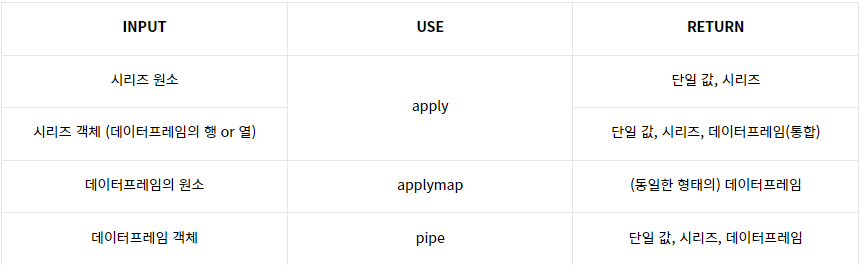

# 열 재구성

* 열 순서 변경

        DataFrame[재구성한 열 이름의 리스트]
    
'titanic' 데이터셋의 일부분(5행 x 4열)을 선택하여 데이터프레임 df를 만들고 df를 출력해서 내용을 확인한다. 리스트 슬라이싱과 다르게 마지막 범위의 값이 포함된다.

In [16]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[0:4, 'survived':'age']
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [17]:
# 열 이름의 리스트 만들기
columns = list(df.columns.values)
columns

['survived', 'pclass', 'sex', 'age']

sorted() 함수에 columns 변수를 입력하면 열 이름이 알파벳 순으로 정렬된다. 정렬된 열 이름의 리스트를 이용하여 df에서 해당 열들을 선택한다.

In [18]:
columns_sorted = sorted(columns)
df_sorted = df[columns_sorted]
df_sorted

,age,pclass,sex,survived
0,22.0,3,male,0
1,38.0,1,female,1
2,26.0,3,female,1
3,35.0,1,female,1
4,35.0,3,male,0


reversed() 함수에 columns 변수를 전달하면 기존 순서의 정반대 역순으로 정렬된다. 정렬 결과를 리스트로 반환하고 이 리스트로 데이터프레임 열 순서를 반영해보자

In [19]:
columns_reversed = list(reversed(columns))
df_reversed = df[columns_reversed]
df_reversed

,age,sex,pclass,survived
0,22.0,male,3,0
1,38.0,female,1,1
2,26.0,female,3,1
3,35.0,female,1,1
4,35.0,male,3,0


임의의 순서로 열 이름을 재배치한 상태로 데이터프레임 df에서 각 열을 순서에 맞춰서 선택할 수 있다.

In [20]:
columns_customed = ['pclass', 'sex', 'age', 'survived']  
df_customed = df[columns_customed]
df_customed

,pclass,sex,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


* 열 분리

하나의 열이 여러가지 정보를 담고 있을 때 각 정보를 서로 분리해서 사용하는 경우가 있다. 어떤 열에 '연월일' 정보가 있을 땐 '연','월','일'을 구분해서 3개의 열을 만드는 것이나, 사람의 이름이 들어 있는 열을 '성'과 '이름'으로 구분하는 것을 예로 들 수 있다.

시리즈의 str 속성으로 문자열 데이터에 접근하는 방법을 이용하여 '연월일'에서 '연','월','일'로 구분해보자.

In [21]:
import pandas as pd

df = pd.read_excel('경로/주가데이터.xlsx', engine='openpyxl')
display(df.head())
print(df.dtypes)

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039


연월일     datetime64[ns]
당일종가             int64
전일종가             int64
시가               int64
고가               int64
저가               int64
거래량              int64
dtype: object


astype() 메소드를 사용하여 '연월일' 열의 시간형 데이터를 문자열로 변경한다. split() 메소드를 사용하여 '-'를 기준으로 '연', '월', '일'로 분리하여 리스트로 정리한다.

In [22]:
df['연월일'] = df['연월일'].astype('str')
dates = df['연월일'].str.split('-')
dates.head()

0    [2018, 07, 02]
1    [2018, 06, 29]
2    [2018, 06, 28]
3    [2018, 06, 27]
4    [2018, 06, 26]
Name: 연월일, dtype: object

dates 변수에 저장된 문자열 리스트의 원소를 선택하기 위해 get() 메소드를 활용한다. 각 원소 리스트의 인덱스 0, 1, 2를 전달하여 '연', '월', '일' 데이터를 따로 선택할 수 있다. 순서대로 데이터프레임의 새로운 열로 추가한다.

        Series.str.get(인덱스)

In [23]:
df['연'] = dates.str.get(0)
df['월'] = dates.str.get(1)
df['일'] = dates.str.get(2)
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26


# 필터링

시리즈 또는 데이터프레임의 데이터 중에서 특정 조건식을 만족하는 원소만 따로 추출하는 개념이다. 가장 대표적인 방법인 불린 인덱싱(boolean indexing)부터 알아보자.

* 불린 인덱싱

시리즈 객체에 어떤 조건식을 적용하면 각 원소에 대해 참/거짓을 판별하여 불린(참, 거짓)값으로 구성된 시리즈를 반환한다. 이때 참에 해당하는 데이터 값을 따로 선택할 수 있는데, 많은 데이터 중에서 어떤 조건을 만족하는 데이터만을 추출하는 필터링 기법의 한 유형이다.

데이터프레임의 각 열은 시리즈 객체이므로, 조건식을 적용하면 각 원소가 조건을 만족하는지 여부를 값으로 표시하여 불린 시리즈를 만들 수 있다. 이 불린 시리즈를 데이터 프레임에 대입하면 조건을 만족하는 행들만 선택할 수 있다.

        DataFrame[불린 시리즈]

In [24]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

# 나이가 10대인 승객만 따로 선택
mask1 = (10 <= titanic.age) & (titanic.age < 20)
df_teen = titanic.loc[mask1, :]
df_teen.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [25]:
# 나이가 10세 미만(0~9)이고 여성인 승객만 따로 선택
mask2 = (titanic.age < 10) & (titanic.sex == "female")
df_female_under10 = titanic.loc[mask2, :]
df_female_under10.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [26]:
# 나이가 10세 미만(0~9) 또는 60세 이상인 승객의 age, sex, alone 열만 선택
mask3 = (titanic.age < 10) | (titanic.age >= 60)
df_under10_moerthan60 = titanic.loc[mask3, ['age','sex','alone']]
df_under10_moerthan60.head()

,age,sex,alone
7,2.0,male,False
10,4.0,female,False
16,2.0,male,False
24,8.0,female,False
33,66.0,male,True


* isin() 메소드 활용

데이터프레임의 열에 isin() 메소드를 적용하면 특정 값을 가진 행들을 따로 추출할 수 있다. 이때 isin() 메소드에 데이터프레임의 열에서 추출하려는 값들로 만든 리스트를 전달한다.

        DataFrame.isin(추출 값의 리스트)

'titanic' 데이터셋의 'sibsp' 열의 값이 3, 4, 5 중에서 하나인 행들을 추출해본다. 'sibsp'열은 함께 탑승한 형제 또는 배우자의 수를 나타낸다. 불린 인덱싱과 비교하여 살펴보자.

In [27]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')

# pd.set_option('display.max_columns', 10)

# 함께 탑승한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출 - 불린 인덱싱
mask3 = titanic['sibsp'] == 3
mask4 = titanic['sibsp'] == 4
mask5 = titanic['sibsp'] == 5
df_boolean = titanic[mask3 | mask4 | mask5]
df_boolean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


In [28]:
mask = (titanic['sibsp'] == 3) | (titanic['sibsp'] == 4) | (titanic['sibsp'] == 5)
df_boolean = titanic[mask]
df_boolean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


In [29]:
# isin() 메소드 활용
isin_filter = titanic['sibsp'].isin([3, 4, 5])
df_isin = titanic[isin_filter]
df_isin.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False


# 데이터프레임 합치기

데이터가 여러 군데 나누어져 있을 때 하나로 합치거나 데이터를 연결해야 하는 경우가 있다. 판다스에서 데이터프레임을 합치거나 연결할 때는 사용하는 함수와 메소드는 여러 가지가 있는데, 대표적으로 concat(), merge(), join() 등을 예로 들 수 있다.

* 데이터프레임 연결

서로 다른 데이터프레임들의 구성 형태와 속성이 균일하다면, 행 또는 열 중에 어느 한 방향으로 이어 붙여도 데이터의 일관성을 유지할 수 있다. 기존 데이터프레임의 형태를 유지하면서 이어 붙이는 개념으로 판다스 concat() 함수를 활용한다

        pandas.concat(데이터프레임 리스트)

concat()은 축 방향을 지정하지 않으면 기본 옵션(axis=0)이 적용되어 위 아래 방향으로 연결된다.

이때 각 데이터프레임의 행 인덱스는 본래 형태를 유지한다.

열 이름에 대해서는 join='outer' 옵션이 기본 적용되어, df1의 열 이름(A, B, C)와 df2의 열 이름(B, C, D, E)의 합집합으로 연결 데이터프레임의 열 이름 배열(A, B, C, D, E)를 구성한다. 한편 join='inner' 옵션의 경우 데이터프레임에 공통으로 속하는 교집합(B, C)가 기준이 된다.

In [30]:
import pandas as pd

# 데이터프레임 만들기
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

display(df1)
print()
display(df2)

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3


,a,b,c,d
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


In [31]:
# 2개의 데이터프레임을 위 아래 행 방향으로 이어 붙이기
result1 = pd.concat([df1, df2])
result1

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


ignore_index=True 옵션은 기존 행 인덱스를 무시하고 새로운 행 인덱스를 설정한다.

In [32]:
# ignore_index=True 옵션 설정
result2 = pd.concat([df1, df2], ignore_index=True)
result2

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


axis=1 옵션을 사용하면 데이터프레임을 좌우 열 방향으로 연결한다. 따라서 기존 열 이름 배열이 그대로 유지된다. 연결되는 데이터프레임의 행 인덱스는 join='outer' 옵션이 기본값으로 적용되어 각 데이터프레임의 행 인덱스들의 합집합으로 구성된다.

In [33]:
result3 = pd.concat([df1, df2], axis=1)
result3

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


In [34]:
# join='inner'를 사용해보자
result4 = pd.concat([df1, df2], axis=1, join='inner')
result4

,a,b,c,a,b,c,d
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3


데이터프레임과 시리즈를 좌우 열 방향으로 연결할 수도 있다. 데이터프레임에 열을 추가하는 것과 같다. 이때 시리즈의 이름이 데이터프레임의 열 이름으로 변환된다. 단, 데이터프레임의 행 인덱스와 시리즈의 인덱스가 같아야한다. 공통 인덱스가 없을 경우 NaN으로 처리한다.


In [35]:
# 시리즈
sr1 = pd.Series(['e0', 'e1', 'e2', 'e3'], name='e')
sr2 = pd.Series(['f0', 'f1', 'f2'], name='f', index=[3, 4, 5])
sr3 = pd.Series(['g0', 'g1', 'g2', 'g3'], name='g')
display(sr1)
display(sr2)
display(sr3)

0    e0
1    e1
2    e2
3    e3
Name: e, dtype: object

3    f0
4    f1
5    f2
Name: f, dtype: object

0    g0
1    g1
2    g2
3    g3
Name: g, dtype: object

In [36]:
# df1과 sr1 좌우 열 방향으로 연결
result4 = pd.concat([df1, sr1], axis=1)
result4

,a,b,c,e
0,a0,b0,c0,e0
1,a1,b1,c1,e1
2,a2,b2,c2,e2
3,a3,b3,c3,e3


In [37]:
# df1과 sr2 - 좌우
result5 = pd.concat([df2, sr2], axis=1, sort=True)
result5

,a,b,c,d,f
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,f0
4,a4,b4,c4,d4,f1
5,a5,b5,c5,d5,f2


In [38]:
result6 = pd.concat([sr1, sr3], axis=1)
result6

,e,g
0,e0,g0
1,e1,g1
2,e2,g2
3,e3,g3


In [39]:
result7 = pd.concat([sr1, sr3], axis=0)
result7

0    e0
1    e1
2    e2
3    e3
0    g0
1    g1
2    g2
3    g3
dtype: object

* 데이터프레임 병합

merge() 함수는 SQL의 join 명령과 비슷한 방식으로 어떤 기준에 의해 두 데이터프레임을 병합하는 개념이다. 이때 기준이 되는 열이나 인덱스를 키(key)라고 부른다. 키가 되는 열이나 인덱스는 반드시 양쪽 데이터프레임에 모두 존재해야한다.

        pandas.merge(df_left, df_right, how='inner', on=None)

In [40]:
import pandas as pd

# IPyhton 디스플레이 설정 변경 
# pd.set_option('display.max_columns', 10)                  # 출력할 최대 열의 개수
# pd.set_option('display.max_colwidth', 20)                 # 출력할 열의 너비
# pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 주식 데이터를 가져와서 데이터프레임 만들기
df1 = pd.read_excel('경로/stock price.xlsx', engine= 'openpyxl')
df2 = pd.read_excel('경로/stock valuation.xlsx', engine= 'openpyxl')

display(df1)
display(df2)

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475


,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


병합하려는 두 데이터프레임을 merge() 함수에 전달한다. on=None 옵션과 how='inner' 옵션이 기본값으로 적용된다. on=None 옵션은 두 데이터프레임에 공통으로 속하는 모든 열을 기준(키)으로 병합한다는 뜻이다.

한편 how='inner' 옵션은 기준이 되는 열의 데이터가 양쪽 데이터프레임에 공통으로 존재하는 교집합일 경우에만 추출한다는 뜻이다. 

In [41]:
# 데이터프레임 합치기 - 교집합
merge_inner = pd.merge(df1, df2)
merge_inner

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


이번에는 on='id' 옵션과 how='outer' 옵션을 설정한다. on='id' 옵션은 두 데이터프레임의 공통 열 중에서 'id' 열을 키로 병합한다는 뜻이다. how='outer' 옵션은 기준이 되는 'id'열의 데이터가 데이터프레임 중 어느 한쪽에만 속하더라도 포함한다는 뜻이다. 따라서 'id' 열 기준으로 모든 종목의 데이터가 포함된다. 어느 한쪽이라도 데이터가 없는 열에는 NaN값이 지정된다.

In [42]:
# 데이터프레임 합치기 - 합집합
merge_outer = pd.merge(df1, df2, how='outer', on='id')
merge_outer

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


how='left' 옵션을 설정하면 왼쪽 데이터프레임의 키 열에 속하는 데이터 값을 기준으로 병합한다. 한편 left_on과 right_on 옵션을 사용하여 좌우 데이터프레임에 각각 다르게 키를 지정할 수 있다.

df1의 'stock_name'열과 df2의 'name'열을 기준으로 병합한다. 기준열이 아닌 'id'열의 경우 양쪽 데이터프레임에 모두 속하기 때문에 'id_x', 'id_y'와 같이 구분하여 표시된다.

In [43]:
merge_left = pd.merge(df1, df2, how='left', left_on='stock_name', right_on='name')
merge_left

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,145990.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,185750.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,204210.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


In [44]:
merge_right = pd.merge(df1, df2, how='right', left_on='stock_name', right_on='name')

merge() 함수를 불린 인덱싱과 함꼐 사용하면 원하는 데이터를 추출할 수 있다.

주가 50000만 미만인 종목을 찾고, 해당 종목의 벨류에이션 지표를 확인한다. 주가 데이터와 벨류에이션 지표가 다른 데이터프레임에 있기 때문에 merge() 함수를 사용한다. on=None 옵션과 how='inner' 옵션이 기본값으로 적용되기 때문에 두 데이터프레임에 공통으로 존재하는 열(id)을 기준으로 기준 열들의 값이 양쪽에 공통으로 존재하는 데이터가 추출된다.

In [45]:
price = df1[df1['price'] < 50000]
price

,id,stock_name,value,price
2,138250,엔에스쇼핑,14558.666667,13200
4,142280,녹십자엠에스,468.833333,10200
9,204210,모두투어리츠,3093.333333,3475


In [46]:
value = pd.merge(price, df2)
value

,id,stock_name,value,price,name,eps,bps,per,pbr
0,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


* 데이터프레임 결합

판다스 join() 메소드는 merge() 함수를 기반으로 만들어졌기 때문에 기본 작동 방식이 서로 비슷하다. 다만, join() 메소드는 두 데이터프레임의 행 인덱스를 기준으로 결합하는 점에서 merge() 함수와 차이가 있다. 하지만 join() 메소드에서도 on=keys 옵션을 설정하면 행 인덱스 대신 다른 열을 기준으로 결합하는 것이 가능하다.

        DataFrame1.join(DataFrame2, how='left'), how='left'가 기본옵션


In [47]:
import pandas as pd

df1 = pd.read_excel('경로/stock price.xlsx', index_col='id', engine='openpyxl')
df2 = pd.read_excel('경로/stock valuation.xlsx', index_col='id', engine='openpyxl')

# df1의 행 인덱스에 해당하는 10개의 종목의 id를 기준으로 결합되어 데이터프레임이 반환된다.
df3 = df1.join(df2)
df3

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
139480,이마트,239230.833333,254500,이마트,18268.166667,295780.0,13.931338,0.860437
142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090.0,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684.0,25.185866,2.470259
192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN


이번에는 how='inner' 옵션을 적용해서 두 데이터프레임에 공통적으로 존재하는 행 인덱스를 기준으로 추출한다.

In [48]:
df4 = df1.join(df2, how='inner')
df4

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


# 그룹 연산

복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나눠서 관찰하는 것도 좋은 방법이다. 이처럼 특정 기준을 적용하여 몇 개의 그룹으로 분할하여 처리하는 것을 그룹 연산이라고 부른다.

특히 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이다. 3단계의 과정으로 이루어지고, 데이터를 그룹으로 분할하는 1단계 과정을 판다스 groupby() 메소드를 사용한다.

1단계) 분할(split) : 데이터를 특정 조건에 의해 분할

2단계) 적용(apply) : 데이터를 집계, 변환, 필터링하는데 필요한 메소드 적용

3단계) 결합(combine) : 2단계의 처리 결과를 하나로 결합

* 그룹 객체 만들기(분할 단계)

#### 1개 열을 기준으로 그룹화

groupby() 메소드는 데이터프레임의 특정 열을 기준으로 데이터프레임을 분할하여 그룹 객체를 반환한다. 기준이 되는 열은 1개도 가능하고, 여러 열을 리스트로 입력할 수도 있다.

        DataFrame.groupby(기준이 되는 열)

먼저 열 1개를 기준으로 분할하여 그룹 객체를 만드는 방법이다. 'titanic' 데이터셋에서 5개의 열을 선택하여 만든 데이터프레임(df)을 'class' 열을 기준(키)으로 하여 그룹으로 나눈다.

In [49]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

print('승객 수: ',len(df))
display(df.head())

승객 수:  891


,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [50]:
# class 열을 기준으로 분할
grouped = df.groupby(['class'])
print(grouped)

'class' 열에는 'First', 'Second', 'Third'라는 3개의 값이 들어있다. 이 3개의 값을 기준으로 891명의 데이터가 3개의 그룹으로 나누어 진다. 반복문을 이용하여 그룹 객체(grouped)의 내용을 출력하자.

In [51]:
for k, g in grouped:
    print('* key : ',k)
    print('* number : ', len(g))
    print(g.head())
    print()

* key :  First
* number :  216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1

* key :  Second
* number :  184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1

* key :  Third
* number :  491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0



위에서 생성한 그룹 객체(grouped)에 연산 메소드를 적용할 수 있다. 다음으로는 grouped 객체에 들어있는 3개의 그룹에 대하여 그룹별 평균값을 구하기 위해 mean() 메소드를 적용한다. 이때 연산이 가능한 열에 대해서만 선택적으로 연산을 수행한다. 따라서 문자열 데이터를 갖는 'sex', 'class'열은 제외하고, 숫자형 데이터를 가진 열에 대해서는 평균값을 계산한다. 1등석의 평균 나이가 38세로 가장 많고, 구조 확률도 63% 정도로 가장 높다는 정보를 얻을 수 있다.

In [52]:
# 연산 메소드 적용
average = grouped.mean()
average

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


그룹 객체에 get_group() 메소드를 적용하면 특정 그룹만을 선택할 수 있다. grouped 객체의 3개 그룹 중 키 값이 'Third'인 3등석 승객 데이터를 가진 그룹을 따로 선택하여 추출한다.

In [53]:
group3 = grouped.get_group('Third')
group3.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0


#### 여러 열을 기준으로 그룹화

이번에는 groupby() 메소드에 여러 개의 열을 리스트로 전달하는 방법을 알아보자. 여러 개의 기준 값을 사용하기 때문에 반환되는 그룹 객체의 인덱스는 다중 구조를 갖는다.

        DataFrame.groupby(기준이 되는 열의 리스트)

groupby() 메소드에 두 열('class', 'sex')을 인자로 전달하면 두 열이 갖는 원소 값들로 만들 수 있는 모든 조합으로 키를 생성한다. 그리고 조합된 키를 기준으로 그룹 객체를 만든다. 'class'열에는 'First', 'Second', 'Third'라는 3개의 값이 들어 있고, 'sex'열에는 'male', 'female' 2개의 값이 들어있다. 가능한 조합은 ('class', 'sex',) 형식으로 투플로 지정되는데, 총 6개의 키ㅏ 조합으로 만들어진다.

In [54]:
group_two = df.groupby(['class', 'sex'])

for k, g in group_two:
    print('* key : ', k)
    print('* number : ', len(g))
    print(g.head())
    print()

* key :  ('First', 'female')
* number :  94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1

* key :  ('First', 'male')
* number :  122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0

* key :  ('Second', 'female')
* number :  76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1

* key :  ('Second', 'male')
* number :  108
     age   sex   class  fare  survived
17

group_two 객체의 각 그룹에 mean() 메소드를 적용한다. 이때 데이터프레임이 반환되는데, 키가 되는 2개의 열('class', 'sex')의 값으로부터 2중 멀티 인덱스가 지정된다.

In [55]:
# grouped_two 그룹 객체에 연산 메소드 적용
average_two = group_two.mean()
display(average_two)
print()
print(type(average_two))

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447


<class 'pandas.core.frame.DataFrame'>


멀티 인덱스를 이용하여 특정 그룹만을 골라서 추출하는 방법이다. get_group() 메소드를 활용하여 인자로 전달하는 키는 투플로 입력한다. 

In [56]:
group3f = group_two.get_group(('Third', 'female'))
group3f.head()

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0


* 그룹 연산 메소드(적용-결합 단계)

#### 데이터 집계(aggregation)

집계 기능을 내장하고 있는 판다스 기본 함수에는 mean(), max(), min(), sum(), count(), size(), var(), std(), descibe(), info(), first(), last() 등이 있다.

        group.집계함수()





In [57]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex','class','fare','survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class'])

# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 변환
std_all = grouped.std()
std_all

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [58]:
type(std_all)

pandas.core.frame.DataFrame

In [59]:
# 각 그룹에 대한 fare 열의 표준편자를 집계하여 시리즈로 변환
std_fare = grouped.fare.std()
std_fare

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

In [60]:
type(std_fare)

pandas.core.series.Series

집계 연산을 처리하는 사용자 정의 함수를 그룹 객체에 적용하려면 agg() 메소드를 사용한다.

        group.agg(매핑 함수)

In [61]:
def min_max(x):
    return x.max() - x.min()

# 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계
agg_minmax = grouped.agg(min_max)
agg_minmax.head()

,age,fare,survived
class,,,
First,79.08,512.3292,1
Second,69.33,73.5000,1
Third,73.58,69.5500,1


각 그룹별로 연산이 가능한 열에 대한 최대값과 최소값의 차를 구하면 데이터 값의 분포 범위를 알 수 있다.

동시에 여러 개의 함수를 사용하여 각 그룹별 데이터에 대한 집계 연산을 처리할 수 있따. 각각의 열에 여러 개의 함수를 일괄 적용할 때는 리스트 형태로 인수를 전달하고, 열마다 다른 종류의 함수를 적용하려면 {열:함수} 형태의 딕셔너리를 전달한다.

        모든 열에 여러 함수 매핑 : group.agg([함수1, 함수2, 함수3, ..])
        각 열마다 다른 함수 매핑 : group.agg({'열1':함수1, '열2':함수2, ...})

In [62]:
# 여러 함수를 각 열에 동일하게 적용하여 집계
agg_all = grouped.agg(['min', 'max'])
agg_all.head()

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [63]:
# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare':['min','max'], 'age':'mean'})
agg_sep.head()

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

#### 그룹 연산 데이터 변환

agg() 메소드는 각 그룹별 데이터에 연산을 위한 함수를 구분 적용하고, 그룹별로 연산 결과를 집계하여 반환한다. 반면, transform() 메소드는 그룹별로 구분하여 각 원소에 함수를 적용하지만 그룹별 집계 대신 각 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환한다. 즉, 그룹 연산의 결과를 연본 데이터프레임과 같은 형태로 변형하여 정리하는 것이다.

        group.transform(매핑 함수)







In [64]:
# 집계 연산 메소드를 사용하여 개별 그룹의 평균과 표준편자를 계산
# 각 그룹에 대해 반복문을 이용하여 z-score를 계산하고, 각 그룹별로 첫 3행의 결과를 출력

import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

grouped = df.groupby(['class'])

# 그룹별 age 열의 평균 집계 연산
age_mean = grouped.age.mean()
age_mean

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

In [65]:
# 그룹별 age 열의 표준편자 집계 연산
age_std = grouped.age.std()
age_std

class
First     14.802856
Second    14.001077
Third     12.495398
Name: age, dtype: float64

In [66]:
# 그룹 객체의 age 열을 iteration으로 z-score를 계산하여 출력
for key, group in grouped.age:
    group_zscore = (group-age_mean.loc[key]) / age_std.loc[key]
    print('* origin : ', key)
    print(group_zscore.head(3))
    print()

* origin :  First
1   -0.015770
3   -0.218434
6    1.065103
Name: age, dtype: float64

* origin :  Second
9    -1.134029
15    1.794317
17         NaN
Name: age, dtype: float64

* origin :  Third
0   -0.251342
2    0.068776
4    0.789041
Name: age, dtype: float64



이번에는 transform() 메소드를 사용하여 'age'열의 데이터를 z-score로 직접 변환한다. z-score를 계산하는 사용자 함수를 정의하고, transform() 메소드의 인자로 전달한다. 각 그룹별 평균과 표준편차를 이용하여 각 원소의 z-score를 계산하지만, 반환되는 객체는 그룹별로 나누지 않고 원래 행 인덱스 순서로 정렬된다. 이 경우 891명 승객의 데이터가 본래 행 인덱스 순서대로 정렬된다. 위 결과와 비교하기 위해 각 그룹의 첫 행에 해당하는 1, 9, 0 행을 출력한다.

In [67]:
def z_score(x):
    return (x-x.mean()) / x.std()

# transform() 메소드를 이용하여 age 열의 데이터를 z-score로 변환
age_zscore = grouped.age.transform(z_score)
print(age_zscore.loc[[1, 9, 0]])
print()
print(len(age_zscore))
print()
print(age_zscore[0:9])
print()
print(type(age_zscore))

1   -0.015770
9   -1.134029
0   -0.251342
Name: age, dtype: float64

891

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
5         NaN
6    1.065103
7   -1.851931
8    0.148805
Name: age, dtype: float64

<class 'pandas.core.series.Series'>


#### 그룹 객체 필터링

그룹 객체에 filter() 메소드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남긴다.

        group.filter(조건식 함수)

데이터 개수가 200개 이상인 그룹만을 따로 필터링해보자.

In [68]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

grouped = df.groupby(['class']) 

# 데이터 개수가 200개 이상인 그룹만을 필터링
grouped_filter = grouped.filter(lambda x: len(x) >= 200)
display(grouped_filter.head())
print()
print(type(grouped_filter))

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0



<class 'pandas.core.frame.DataFrame'>


'class' 열을 기준으로 구분된 3개의 그릅 중에서 조건을 만족하는 'First'와 'Third'인 그룹의 데이터만 추출된다.

이번에는 'age' 열의 평균값이 30보다 작은 그룹만을 따로 선택한다.

In [69]:
age_filter = grouped.filter(lambda x: x.age.mean() < 30)
display(age_filter.tail())
print(type(age_filter))

,age,sex,class,fare,survived
884,25.0,male,Third,7.050,0
885,39.0,female,Third,29.125,0
886,27.0,male,Second,13.000,0
888,NaN,female,Third,23.450,0
890,32.0,male,Third,7.750,0


<class 'pandas.core.frame.DataFrame'>


#### 그룹 객체에 함수 매핑

apply() 메소드는 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑한다. 사용자가 원하는 대부분의 연산은 그룹 객체에도 적용할 수 있다.

        group.apply(매핑 함수)

In [70]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

grouped = df.groupby(['class'])

# 집계 : 각 그룹별 요약 통계 정보를 집계
agg_grouped = grouped.apply(lambda x: x.describe())
agg_grouped


age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.495398   11.778142    0.428949
       min      0.420000    0.000000    0.000000
       25%     18.000000    7.750000    0.000000
       50%     24.000000    8.050000    0.000000
       75%     32.000000   15.500000    0.000000
       max     74.000000   69.550000    1.000000

In [71]:
# z-score를 계산하는 사용자 함수를 사용하여 'age'열의 데이터를 z-score로 변환한다.
def z_score(x):
    return (x-x.mean()) / x.std()

age_zscore = grouped.age.apply(z_score) # 기본값 axis=0
age_zscore.head()

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64

In [72]:
# 필터링 : age 열의 데이터 평균이 30보다 작은 그룹만을 필터링하여 출력
age_filter = grouped.apply(lambda x: x.age.mean() < 30)
age_filter

class
First     False
Second     True
Third      True
dtype: bool

In [73]:
for x in age_filter.index:
    if age_filter[x]:
        age_filter_df = grouped.get_group(x)
        print(age_filter_df.head())
        print()

     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0



* 멀티 인덱스

groupby() 메소드에 여러 열을 리스트 형태로 전달하면 각 열들이 다중으로 행 인덱스를 구성하는 것을 보았다. 이처럼 판다스는 행 인덱스를 여러 레벨로 구현할 수 있도록 멀티 인덱스(MultiIndex) 클래스를 지원한다.

먼저 'class'열과 'sex'열에 들어있는 객실 등급과 남녀 성별을 기준으로 그룹화한다. 그룹 객체에 mean() 메소드를 적용하면 그룹별로 각 열의 평균값을 정리하여 반환한다. 이때 반환되는 객체는 멀티 인덱스를 가진 데이터프레임이다.

In [74]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열, sex 열을 기준으로 분할
grouped = df.groupby(['class', 'sex'])

# 그룹 객체에 연산 메서드 적용
gdf = grouped.mean()
display(gdf)
type(gdf)

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

pandas.core.frame.DataFrame

In [75]:
# class 값이 First 인 행을 선택하여 출력
gdf.loc['First']

,age,fare,survived
sex,,,
female,34.611765,106.125798,0.968085
male,41.281386,67.226127,0.368852


In [76]:
# class 값이 First이고, sex값이 female 인 행을 선택하여 출력
gdf.loc[('First', 'female')]

age          34.611765
fare        106.125798
survived      0.968085
Name: (First, female), dtype: float64

이번에는 loc 인덱서 대신 xs 인덱서를 사용한다. 'sex'인덱스에서 'male'값을 갖는 행을 추출한다.

In [77]:
# sex 값이 male인 행을 선택하여 출력
gdf.xs('male', level='sex')

,age,fare,survived
class,,,
First,41.281386,67.226127,0.368852
Second,30.740707,19.741782,0.157407
Third,26.507589,12.661633,0.135447


* 피벗

판다스 pivot_table.() 함수는 엑셀에서 사용하는 피벗테이블과 비슷한 기능을 처리한다. 피벗테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달한다.

'titanic' 데이터셋에서 5개의 열을 추출한다. pivot_table() 함수를 사용하여 데이터프레임 형태를 피벗테이블로 변환한다. 5개의 열 중에서 행 인덱스로는 'class' 열을 지정하고, 열 인덱스에는 'sex' 열을 지정한다. 'age'열을 피벗 테이블의 데이터값으로 사용하고 데이터 집계 함수는 평균값을 계산하는 'mean' 함수를 설정한다.

In [78]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex','class','fare','survived']]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [79]:
# 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,
                      index='class',
                      columns='sex',
                      values='age',
                      aggfunc='mean')
pdf1.head()

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


이번에는 'age'열 대신에 'survived' 열을 피벗의 데이터 값으로 사용하고, 데이터 집계하는 함수를 'mean', 'sum' 2개 사용한다. 'mean' 함수의 계산 결과는 생존률을 나타내고, 'sum' 함수의 결과는 생존자 수를 나타낸다.

In [80]:
pdf2 = pd.pivot_table(df,
                      index='class',
                      columns='sex',
                      values='survived',
                      aggfunc=['mean','sum'])
pdf2.head()

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

pivot_table() 함수에 전달할 인자(행 인덱스, 열 위치, 데이터 값, 집계 함수)에 각각 2개 이상의 열을 입력할 수 있다. 다음으로 행 인덱스와 데이터 값에 해당하는 열을 각각 2개 지정하고, 열 위치에 해당하는 열은 1개를 지정한다. 또한 데이터 집계 함수를 2개 지정한다.



In [81]:
# 행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균 나이, 최대 요금 집계
pdf3 = pd.pivot_table(df,
                      index=['class', 'sex'],
                      columns='survived',
                      values=['age','fare'],
                      aggfunc=['mean', 'max'])
# 행, 열 구조 살펴보기
print(pdf3.index)
print(pdf3.columns)

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])
MultiIndex([('mean',  'age', 0),
            ('mean',  'age', 1),
            ('mean', 'fare', 0),
            ('mean', 'fare', 1),
            ( 'max',  'age', 0),
            ( 'max',  'age', 1),
            ( 'max', 'fare', 0),
            ( 'max', 'fare', 1)],
           names=[None, None, 'survived'])


데이터프레임 pdf3의 index 속성과 columns 속성을 출력해보면, 행 인덱스의 levels 속성에는 2개의 열 ('class', 'sex')이 사용되어 2중 구조이다. 그리고 열은 3중 구조로 이루어진다. 데이터 집계 함수인 'mean'과 'max'가 한 층을 이루고, 데이터 값을 구분하는 'age'와 'fare'열이 다음 층을 이루며, 마지막으로 구조 여부를 나타내는 'survived'열이 위치한다.

In [82]:
pdf3.head()

mean                         ...   max                  
                     age                   fare  ...   age    fare          
survived               0          1           0  ...     1       0         1
class  sex                                       ...                        
First  female  25.666667  34.939024  110.604167  ...  63.0  151.55  512.3292
       male    44.581967  36.248000   62.894910  ...  80.0  263.00  512.3292
Second female  36.000000  28.080882   18.250000  ...  55.0   26.00   65.0000
       male    33.369048  16.022000   19.488965  ...  62.0   73.50   39.0000
Third  female  23.818182  19.329787   19.773093  ...  63.0   69.55   31.3875

[5 rows x 8 columns]

pdf3의 행을 선택하기 위해 xs 인덱서를 사용하는 방법을 살펴보자. xs 인덱서는 기본값으로 행 인덱서에 접근하고, 축 값은 axis=0으로 자동 설정된다. 먼저 행 인덱스가 'First'인 1등석 승객의 데이터를 추출해보자

In [83]:
pdf3.xs('First')

mean                         ...   max                  
                age                   fare  ...   age    fare          
survived          0          1           0  ...     1       0         1
sex                                         ...                        
female    25.666667  34.939024  110.604167  ...  63.0  151.55  512.3292
male      44.581967  36.248000   62.894910  ...  80.0  263.00  512.3292

[2 rows x 8 columns]

이번에는 행 인덱스 레벨 0에서 'First'를 가져오고, 행 인덱스 레벨 1에서 'female'을 가져온다. 두 개의 인덱스 값을 투플로 전달하면 1등석 승객 중에서 여성의 데이터만을 선택할 수 있다.

In [84]:
pdf3.xs(('First', 'female'))

            survived
mean  age   0            25.666667
            1            34.939024
      fare  0           110.604167
            1           105.978159
max   age   0            50.000000
            1            63.000000
      fare  0           151.550000
            1           512.329200
Name: (First, female), dtype: float64

이번에는 행 인덱스 레벨을 직접 지정하는 방법이다. 'sex' 레벨에서 남성 승객을 나타내는 'male'에 해당하는 데이터만을 추출한다.

In [85]:
pdf3.xs('male', level='sex')

mean                        ...   max                  
                age                  fare  ...   age    fare          
survived          0          1          0  ...     1       0         1
class                                      ...                        
First     44.581967  36.248000  62.894910  ...  80.0  263.00  512.3292
Second    33.369048  16.022000  19.488965  ...  62.0   73.50   39.0000
Third     27.255814  22.274211  12.204469  ...  45.0   69.55   56.4958

[3 rows x 8 columns]

이번에는 행 인덱스 레벨 0에서 'Second'를 가져오고, 행 인덱스 레벨 'sex'에서 'male'을 가져온다. 이때 레벨 이름 'sex' 대신에 숫자형 레벨 1을 사용해도 결과는 동일하다.

In [86]:
pdf3.xs(('Second', 'male'), level=[0, 'sex'])

mean                               max                  
                   age               fare            age        fare      
survived             0       1          0        1     0     1     0     1
class  sex                                                                
Second male  33.369048  16.022  19.488965  21.0951  70.0  62.0  73.5  39.0

이제 xs 인덱스를 이용하여 열 인덱스로 접근해보자. 그렇게 하기 위해서 축값을 axis=1로 설정해야한다. 먼저 데이터프레임 pdf3의 'mean' 열을 선택하여 평균값 데이터를 추출한다.

In [87]:
pdf3.xs('mean', axis=1)

age                   fare            
survived               0          1           0           1
class  sex                                                 
First  female  25.666667  34.939024  110.604167  105.978159
       male    44.581967  36.248000   62.894910   74.637320
Second female  36.000000  28.080882   18.250000   22.288989
       male    33.369048  16.022000   19.488965   21.095100
Third  female  23.818182  19.329787   19.773093   12.464526
       male    27.255814  22.274211   12.204469   15.579696

다음으로 열 인덱스 레벨 0에서 평균값을 나타내는 'mean'을 지정하고, 열 인덱스 레벨 1에서 나이를 나타내는 'age'를 지정한다. 그룹별 평균 나이 집계 결과만을 추출하여 반환한다.

In [88]:
pdf3.xs(('mean', 'age'), axis=1)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211

열 인덱스 레벨을 직접 지정한다. 'survived'레벨의 값이 1에 해당하는 데이터만을 추출한다. 따라서 생존자 데이터만을 구분하여 출력하게 된다.

In [89]:
pdf3.xs(1, level='survived', axis=1)

mean               max          
                     age        fare   age      fare
class  sex                                          
First  female  34.939024  105.978159  63.0  512.3292
       male    36.248000   74.637320  80.0  512.3292
Second female  28.080882   22.288989  55.0   65.0000
       male    16.022000   21.095100  62.0   39.0000
Third  female  19.329787   12.464526  63.0   31.3875
       male    22.274211   15.579696  45.0   56.4958

마지막으로 열 인덱스 레벨 0에서 최대값을 나타내는 'max'를 가져오고, 레벨 1에서 객실 요금을 나타내는 'fare'를 가져온다. 'survived' 열을 나타내는 레벨 2에서 구조받지 못한 승객을 나타내는 0을 가져온다. 반환되는 데이터는 구조받지 못한 승객들 객실 요금의 최대값이다.

In [90]:
pdf3.xs(('max', 'fare', 0), level=[0, 1, 2], axis=1)

max
                 fare
survived            0
class  sex           
First  female  151.55
       male    263.00
Second female   26.00
       male     73.50
Third  female   69.55
       male     69.55